<a href="https://colab.research.google.com/github/SankeerthShabad/IDS/blob/main/HW6/Problem2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Test and Training dataset

In [1]:
# importing data sets, test and training

library(readr)
Loans_TestDF <- read_csv("https://raw.githubusercontent.com/SankeerthShabad/IDS/main/HW6/Loans_Test.csv")
Loans_TrainingDF <- read_csv("https://raw.githubusercontent.com/SankeerthShabad/IDS/main/HW6/Loans_Training.csv")

Rows: 49698 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Debt_to_Income_Ratio, FICO_Score, Request_Amount, Interest
lgl (1): Approval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 150302 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Debt_to_Income_Ratio, FICO_Score, Request_Amount, Interest
lgl (1): Approval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### After importing Test and Training data sets there are 49698 Test data and 150302 Training data.

# Using head function for Test and Training

In [2]:
# head of test and training

head(Loans_TestDF)
head(Loans_TrainingDF)

Approval,Debt_to_Income_Ratio,FICO_Score,Request_Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,413,2000,900
FALSE,0,449,1000,450
FALSE,0,454,6000,2700
FALSE,0,456,1000,450
FALSE,0,457,1000,450
FALSE,0,457,8000,3600


Approval,Debt_to_Income_Ratio,FICO_Score,Request_Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,397,1000,450
FALSE,0,403,500,225
FALSE,0,408,1000,450
FALSE,0,408,2000,900
FALSE,0,411,5000,2250
FALSE,0,413,5000,2250


### After using the head function, we can observe 5 column names in the test and training data set.

# Using str for Test and Training data

In [3]:
str(Loans_TestDF)

spec_tbl_df [49,698 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Approval            : logi [1:49698] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt_to_Income_Ratio: num [1:49698] 0 0 0 0 0 0 0 0 0 0 ...
 $ FICO_Score          : num [1:49698] 413 449 454 456 457 457 459 461 461 462 ...
 $ Request_Amount      : num [1:49698] 2000 1000 6000 1000 1000 8000 8000 500 6000 19000 ...
 $ Interest            : num [1:49698] 900 450 2700 450 450 3600 3600 225 2700 8550 ...
 - attr(*, "spec")=
  .. cols(
  ..   Approval = col_logical(),
  ..   Debt_to_Income_Ratio = col_double(),
  ..   FICO_Score = col_double(),
  ..   Request_Amount = col_double(),
  ..   Interest = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [4]:
str(Loans_TrainingDF)

spec_tbl_df [150,302 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Approval            : logi [1:150302] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt_to_Income_Ratio: num [1:150302] 0 0 0 0 0 0 0 0 0 0 ...
 $ FICO_Score          : num [1:150302] 397 403 408 408 411 413 416 421 422 432 ...
 $ Request_Amount      : num [1:150302] 1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Interest            : num [1:150302] 450 225 450 900 2250 2250 2700 900 5400 4500 ...
 - attr(*, "spec")=
  .. cols(
  ..   Approval = col_logical(),
  ..   Debt_to_Income_Ratio = col_double(),
  ..   FICO_Score = col_double(),
  ..   Request_Amount = col_double(),
  ..   Interest = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


### str() is used to check internal structure of the Test and Training data set

# Checking missing values of Test and Training

In [5]:
sum(is.na(Loans_TestDF))
sum(is.na(Loans_TrainingDF))

[1] 0

[1] 0

### As we can see there is no missing values in Test and Training data set.

# prop.table() function for test and training data

In [6]:
prop.table(table(Loans_TestDF$Approval))
prop.table(table(Loans_TrainingDF$Approval))


    FALSE      TRUE 
0.5017103 0.4982897 


    FALSE      TRUE 
0.4994345 0.5005655 

### Fraction of Test and Training Approval. We can observe there are 0.5 false rate and 0.49 true rate in test data and 0.49 and 0.50 rate in Training rate.

# rpart.plot, party, caret packages

In [7]:
# Installing required packages

install.packages('rpart.plot')
install.packages('party')
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [8]:
# Library for rpart,rpart.plot,party,caret

library(rpart)
library(rpart.plot)
library(party)
library(caret)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


# CART model and Visualizing the Decision tree

n= 150302 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150302 75066 TRUE (0.49943447 0.50056553)  
  2) FICO_Score< 659.5 46002  1808 FALSE (0.96069736 0.03930264) *
  3) FICO_Score>=659.5 104300 30872 TRUE (0.29599233 0.70400767)  
    6) Debt_to_Income_Ratio>=0.305 12873  1679 FALSE (0.86957197 0.13042803) *
    7) Debt_to_Income_Ratio< 0.305 91427 19678 TRUE (0.21523182 0.78476818) *

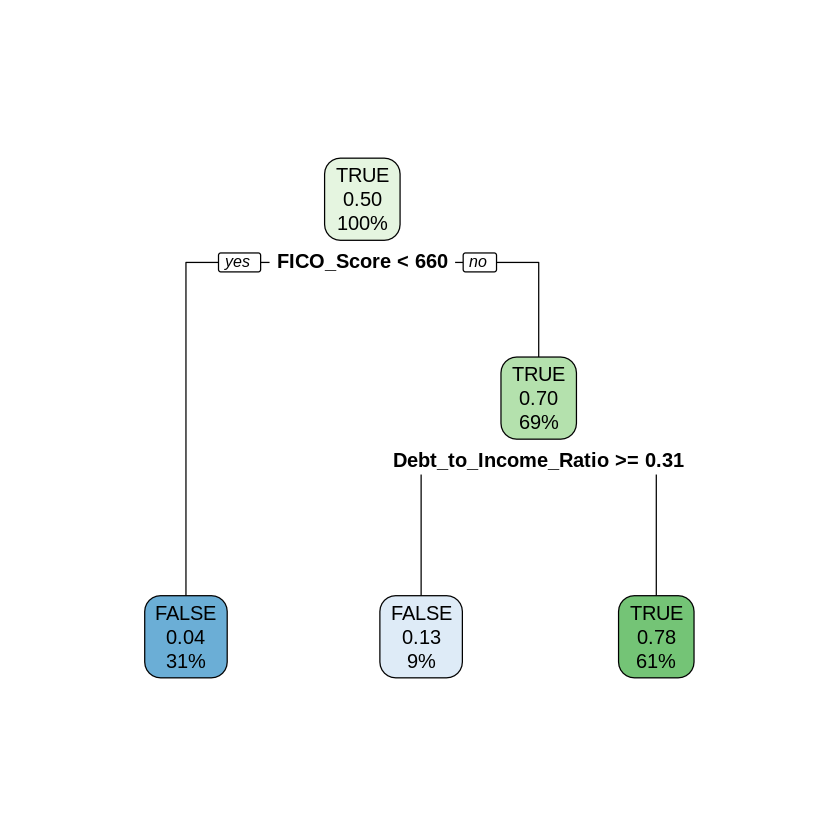

In [9]:
#

set.seed(100)
model1_CART <- rpart(Approval ~., data = Loans_TrainingDF, method = "class")
model1_CART

# Plot the trees
par(xpd = NA) # Avoid clipping the text in some device
rpart.plot(model1_CART)
#text(model1_CART, digits = 2)

**CART MODEL:**
* If FICO score is higher than 660 and debt-to-income ratio is more than 0.305, your loan will be authorized.

* If FICO score is higher than 660 but debt-to-income ratio is less than 0.305, your loan will be denied.

* If FICO score is less than 660, loan application will be denied.

**Decision tree:**

*   Nodes divided into two where FICO score is higher than 660 and another node lower than 660
*   Nodes divided into two where FICO score is higher than 660 and debt-to-income ratio is more than 0.305 and another node lower than 0.305









# Using predict

In [10]:
pred_CART <- predict(model1_CART, Loans_TestDF, 'class')
head(pred_CART)

1     2     3     4     5     6 
FALSE FALSE FALSE FALSE FALSE FALSE 
Levels: FALSE TRUE

# Confusion Matrix

In [11]:
# Confusion Matrix

confusionMatrix(table(Loans_TestDF$Approval, pred_CART))

Confusion Matrix and Statistics

       pred_CART
        FALSE  TRUE
  FALSE 18314  6620
  TRUE   1171 23593
                                        
               Accuracy : 0.8432        
                 95% CI : (0.84, 0.8464)
    No Information Rate : 0.6079        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.6867        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9399        
            Specificity : 0.7809        
         Pos Pred Value : 0.7345        
         Neg Pred Value : 0.9527        
             Prevalence : 0.3921        
         Detection Rate : 0.3685        
   Detection Prevalence : 0.5017        
      Balanced Accuracy : 0.8604        
                                        
       'Positive' Class : FALSE         
                                        

### We can see that the true positive is 23593, the false positive is 1171, the false negative is 6620, and the true negative is 18314. We can also see that the accuracy is 84 percent and that the sensitivity and specificity are also high.

In [26]:
#accuarcy for cart model
CART_Accuracy <- sum(pred_CART == Loans_TestDF$Approval)/ length(pred_CART)
cat('CART Model Accuracy :',CART_Accuracy * 100)

CART Model Accuracy : 84.32331

# Using as.factor() function

In [16]:
# as.factor() function

Loans_TrainingDF$Approval = as.factor(Loans_TrainingDF$Approval)
head(Loans_TrainingDF$Approval)

[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

In [13]:
install.packages('C50')
library(C50)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Formula’, ‘inum’, ‘partykit’, ‘Cubist’




# C5.0 Model

In [17]:
# model C5.0

model2_c5 =C5.0(Loans_TrainingDF[,-1], Loans_TrainingDF$Approval, control = C5.0Control(minCases=1000))
model2_c5


Call:
C5.0.default(x = Loans_TrainingDF[, -1], y = Loans_TrainingDF$Approval,
 control = C5.0Control(minCases = 1000))

Classification Tree
Number of samples: 150302 
Number of predictors: 4 

Tree size: 8 

Non-standard options: attempt to group attributes, minimum number of cases: 1000


### We can see from the result that the number of samples is 150302, the number of predictors is 4, and the tree size is 8; from the output, we can display the decision tree.

# Ploting tree for C5.0 model

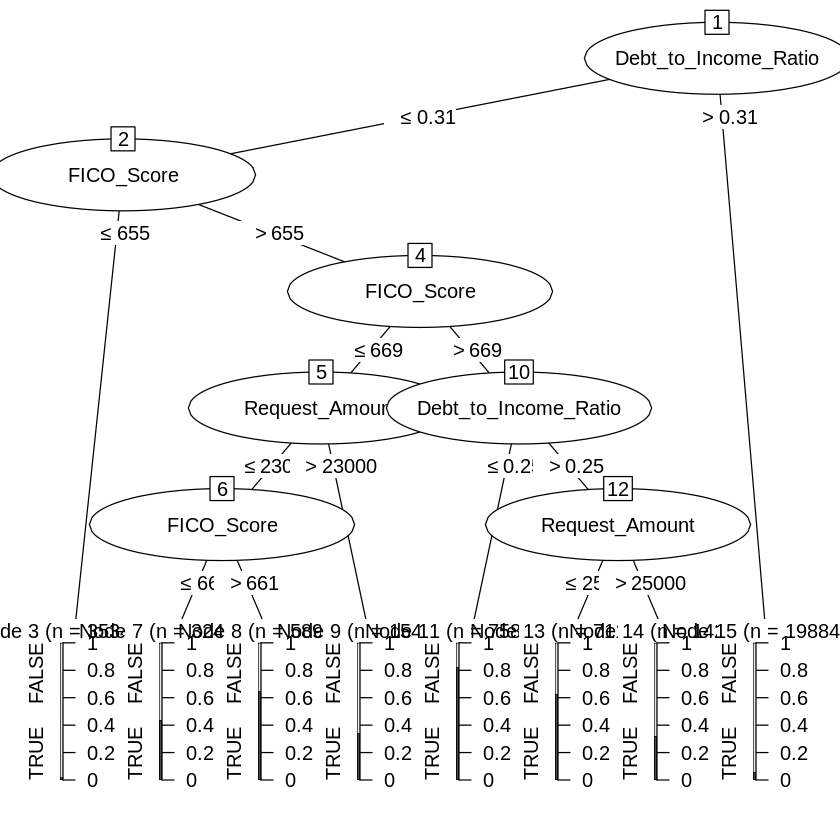

In [18]:
plot(model2_c5)

# Using predict() function

In [30]:
# Using predict()

pred_C5 <- predict(model2_c5, Loans_TestDF)
head(pred_C5)

[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

In [31]:
confusionMatrix(table(Loans_TestDF$Approval, pred_C5))

Confusion Matrix and Statistics

       pred_C5
        FALSE  TRUE
  FALSE 18842  6092
  TRUE   1504 23260
                                         
               Accuracy : 0.8472         
                 95% CI : (0.844, 0.8503)
    No Information Rate : 0.5906         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6945         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9261         
            Specificity : 0.7925         
         Pos Pred Value : 0.7557         
         Neg Pred Value : 0.9393         
             Prevalence : 0.4094         
         Detection Rate : 0.3791         
   Detection Prevalence : 0.5017         
      Balanced Accuracy : 0.8593         
                                         
       'Positive' Class : FALSE          
                                         

### We can see that the true positive is 23260, the false positive is 1504, the false negative is 6092, and the true negative is 18842. We can also see that the accuracy is 84 percent and that the sensitivity and specificity are also high.

# Comparing C5.0 model with CART model 

In [33]:
#accuarcy of c5 model

C5_Accuracy <- sum(pred_C5 == Loans_TestDF$Approval)/ length(pred_C5)
cat('C5 Model Accuracy :',C5_Accuracy * 100)

C5 Model Accuracy : 84.71568

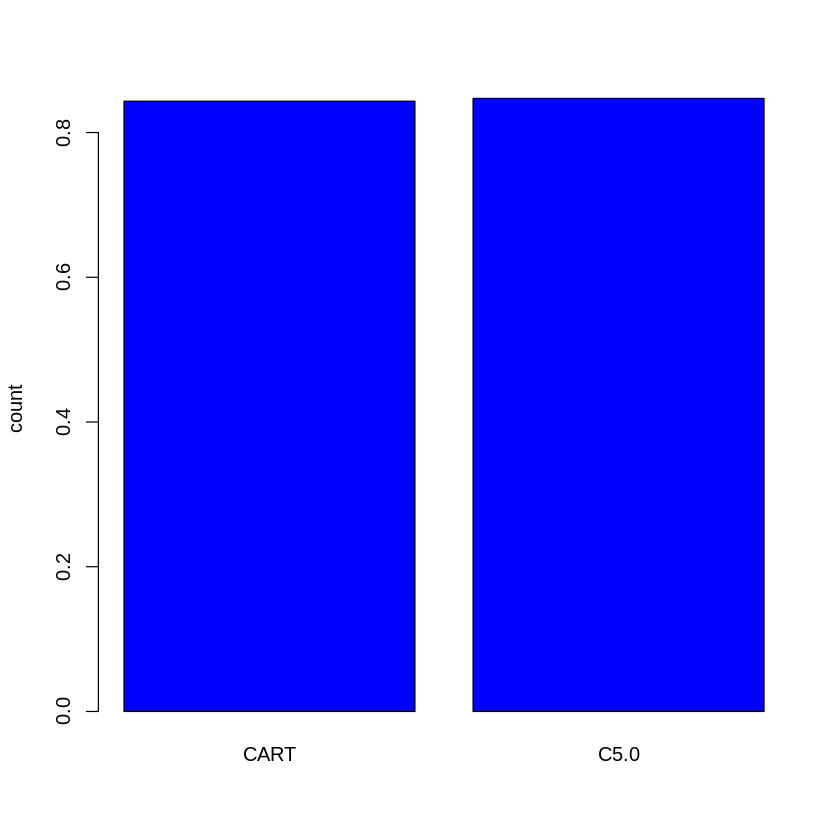

In [35]:
#plotting predict_CART accuracy and predict_c5 accuracy

labels <- c('CART', 'C5.0')
Accuracy = c(CART_Accuracy, C5_Accuracy)

#barplot

barplot(Accuracy, ylab = "count", names.arg = labels, col="blue")

# Summary:
### > The accuracy of the CART model is 84.32331, whereas the accuracy of the c5 model is 84.71568.
### > According to the graph above, the accuracy of both the CART model and the C5 model is nearly same, with a little difference in the values of sensitivity and specificity in the CART and C5 models.
### > The FICO score is the root node in the CART decision tree, while the Debt to Income Ratio is the root node in the C5 decision tree.






